In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from utils.load_csv import load_csv

In [2]:
#df_posicoes_d1 = load_csv("calculo-distancia-percorrida_2025-10-20_silver.csv")
#df_posicoes_d2 = load_csv("calculo-distancia-percorrida_2025-10-19_silver.csv")
#df_posicoes_d3 = load_csv("calculo-distancia-percorrida_2025-10-17_silver.csv")
df_posicoes = load_csv("calculo-distancia-percorrida_2025-10-19_silver_corrigido.csv")

In [3]:
#df_posicoes = pd.concat([df_posicoes_d1, df_posicoes_d2, df_posicoes_d3], ignore_index=True)

In [4]:
df_posicoes["hora_gps"] = pd.to_datetime(df_posicoes["hora_gps"])

df_posicoes = df_posicoes.sort_values("hora_gps").reset_index(drop=True)

dias_unicos = df_posicoes["hora_gps"].dt.date.unique()

mapa_dias = {d: f"dia {i+1}" for i, d in enumerate(dias_unicos)}

df_posicoes["dia"] = df_posicoes["hora_gps"].dt.date.map(mapa_dias)

In [5]:
len(df_posicoes)

5869294

In [6]:
pd.set_option('display.max_columns', None)

df_posicoes.head()

,hora_requisicao,codigo_linha,nome_linha,letreiro,codigo_onibus,x,y,hora_gps,geometry,ponto_final,hora_final,distancia_percorrida,segundos_deslocamento,dia
0,04:11:00,1132,546A-31,STO. AMARO - JD. APURÁ,68502,-46.657106,-23.713947,2025-10-16 21:26:05-03:00,POINT (331067.51905241725 7376460.205567108),POINT (331067.51905241725 7376460.205567108),2025-10-16 21:46:40-03:00,0.000000,1235.0,dia 1
1,04:12:00,1132,546A-31,STO. AMARO - JD. APURÁ,68502,-46.657106,-23.713947,2025-10-16 21:46:40-03:00,POINT (331067.51905241725 7376460.205567108),POINT (331067.51905241725 7376460.205567108),2025-10-16 22:05:03-03:00,0.000000,1103.0,dia 1
2,04:13:00,1132,546A-31,STO. AMARO - JD. APURÁ,68502,-46.657106,-23.713947,2025-10-16 22:05:03-03:00,POINT (331067.51905241725 7376460.205567108),POINT (331067.51905241725 7376460.205567108),2025-10-16 22:24:56-03:00,0.000000,1193.0,dia 1
3,04:14:00,1132,546A-31,STO. AMARO - JD. APURÁ,68502,-46.657106,-23.713947,2025-10-16 22:24:56-03:00,POINT (331067.51905241725 7376460.205567108),POINT (331736.1585884909 7378456.5077547105),2025-10-16 22:39:15-03:00,2105.303126,859.0,dia 1
4,04:15:00,1132,546A-31,STO. AMARO - JD. APURÁ,68502,-46.650322,-23.695993,2025-10-16 22:39:15-03:00,POINT (331736.1585884909 7378456.5077547105),POINT (328628.5017735873 7379376.6372172125),2025-10-16 22:51:25-03:00,3241.013593,730.0,dia 1


In [7]:
df_posicoes['hora_gps'] = pd.to_datetime(df_posicoes['hora_gps'])
df_posicoes['hora_gps'].dt.date.unique()

array([datetime.date(2025, 10, 16), datetime.date(2025, 10, 17),
       datetime.date(2025, 10, 18), datetime.date(2025, 10, 19)],
      dtype=object)

In [8]:
dias_unicos = df_posicoes['dia'].unique()

dias_unicos

array(['dia 1', 'dia 2', 'dia 3', 'dia 4'], dtype=object)

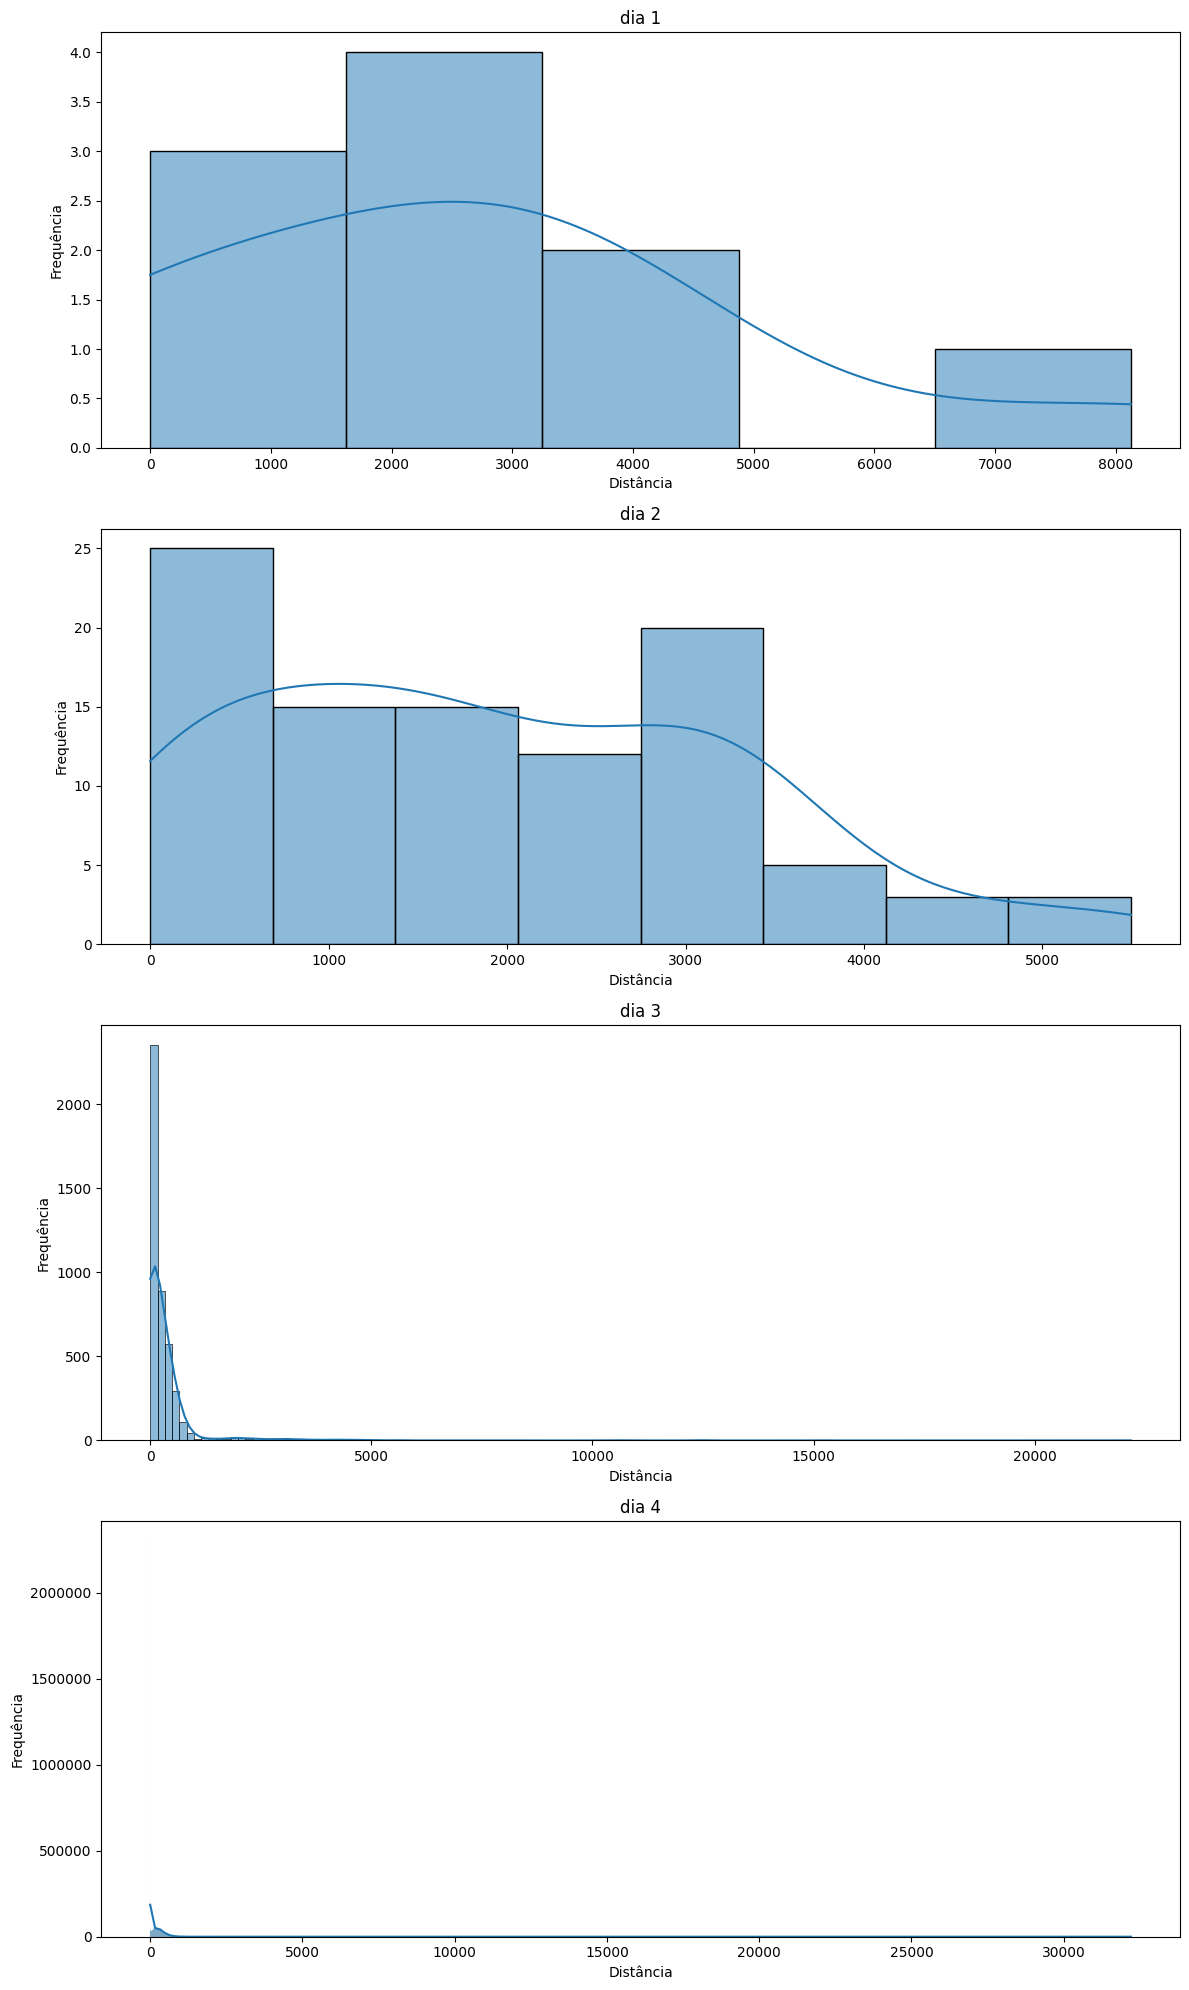

In [9]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    sns.histplot(data=df_posicoes[df_posicoes["dia"] == dia],
                 x="distancia_percorrida", kde=True, ax=ax)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Distância")
    ax.set_ylabel("Frequência")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')
    ax.ticklabel_format(style='plain', axis='y')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [10]:
df_posicoes["velocidade"] = (df_posicoes["distancia_percorrida"] / df_posicoes["segundos_deslocamento"]) * 3.6 # m/s --> km/h

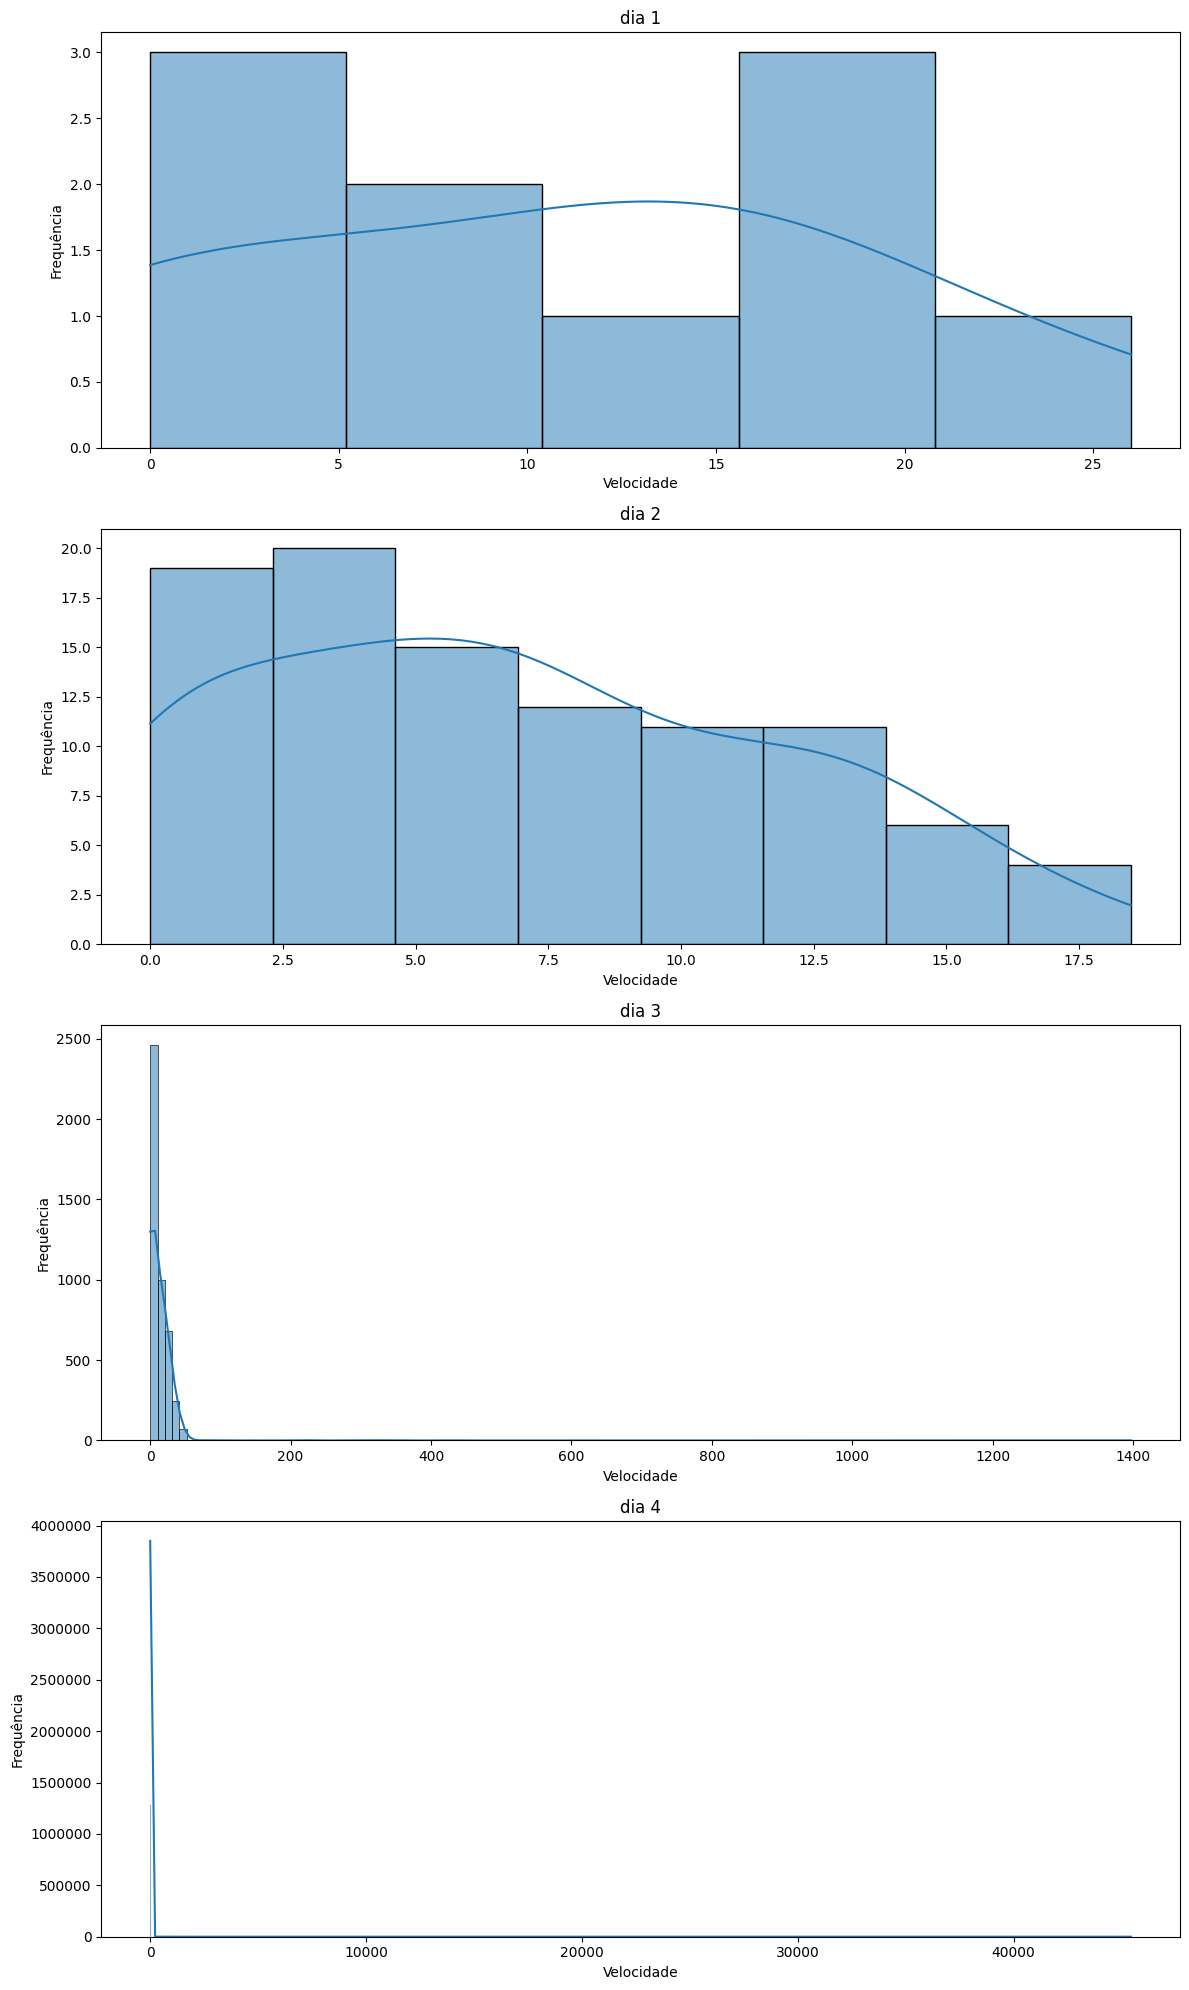

In [11]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    sns.histplot(data=df_posicoes[df_posicoes["dia"] == dia],
                 x="velocidade", kde=True, ax=ax)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Velocidade")
    ax.set_ylabel("Frequência")
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')
    ax.ticklabel_format(style='plain', axis='y')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [12]:
df_posicoes[df_posicoes['velocidade'] > 60]

,hora_requisicao,codigo_linha,nome_linha,letreiro,codigo_onibus,x,y,hora_gps,geometry,ponto_final,hora_final,distancia_percorrida,segundos_deslocamento,dia,velocidade
519,23:59:00,35160,N601-11,TERM. PQ. D. PEDRO II - TERM. GRAJAÚ,61427,-46.630642,-23.546875,2025-10-18 23:58:55-03:00,POINT (333554.7540046456 7394992.889558272),POINT (326958.3580377393 7373820.445862029),2025-10-19 00:00:32-03:00,22176.221766,97.0,dia 3,823.035035
681,23:59:00,33668,2014-10,METRÔ BARRA FUNDA - JD. PERY ALTO,25233,-46.667040,-23.526440,2025-10-18 23:58:58-03:00,POINT (329812.4218885106 7397213.060222222),POINT (329504.6413625056 7404578.132454211),2025-10-19 00:00:28-03:00,7371.500379,90.0,dia 3,294.860015
793,23:59:00,35087,N209-11,METRÔ SANTANA - TERM. CACHOEIRINHA,22874,-46.669775,-23.475017,2025-10-18 23:59:00-03:00,POINT (329467.00830952957 7402904.2928556),POINT (334155.9629387101 7399922.079754811),2025-10-19 00:00:29-03:00,5556.967743,89.0,dia 3,224.776223
825,23:59:00,35109,N307-11,TERM. PINHEIROS - TERM. PQ. D. PEDRO II,32440,-46.702047,-23.566185,2025-10-18 23:59:00-03:00,POINT (326290.1549917804 7392769.64474747),POINT (333509.53847710625 7395103.570769999),2025-10-19 00:00:28-03:00,7587.272803,88.0,dia 3,310.388433
927,23:59:00,35075,809U-21,METRÔ VILA MADALENA - METRÔ BARRA FUNDA,82768,-46.691395,-23.547449,2025-10-18 23:59:02-03:00,POINT (327353.0218155815 7394857.414192826),POINT (329861.7029429177 7397208.094945654),2025-10-19 00:00:31-03:00,3437.903576,89.0,dia 3,139.061268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866099,23:57:00,35160,N601-11,TERM. PQ. D. PEDRO II - TERM. GRAJAÚ,61400,-46.630642,-23.546875,2025-10-19 23:57:32-03:00,POINT (333554.7540046456 7394992.889558272),POINT (326982.38195093337 7373853.627890515),2025-10-19 23:58:24-03:00,22137.399537,52.0,dia 4,1532.589199
5866276,23:57:00,34439,514T-10,CONJ. HAB. TEOTÔNIO VILELA - TERM. SACOMÃ,55225,-46.503546,-23.601976,2025-10-19 23:57:34-03:00,POINT (346594.0141506071 7389033.040901661),POINT (336497.0831774714 7388817.115748428),2025-10-19 23:58:19-03:00,10099.239513,45.0,dia 4,807.939161
5866352,23:57:00,849,1705-10,METRÔ TUCURUVI - JD. SÃO JOÃO,26418,-46.603532,-23.480822,2025-10-19 23:57:35-03:00,POINT (336240.770532244 7402338.596926536),POINT (338148.5777630744 7407560.622658217),2025-10-19 23:58:33-03:00,5559.611603,58.0,dia 4,345.079341
5866355,23:57:00,35208,N841-11,STA. CECÍLIA - TERM. VL. MARIANA,80009,-46.651713,-23.538629,2025-10-19 23:57:35-03:00,POINT (331392.93873939925 7395881.362584467),POINT (333280.0942996921 7390283.372008806),2025-10-19 23:58:33-03:00,5907.525251,58.0,dia 4,366.673981


In [13]:
df_posicoes[df_posicoes['velocidade'] < 0]

,hora_requisicao,codigo_linha,nome_linha,letreiro,codigo_onibus,x,y,hora_gps,geometry,ponto_final,hora_final,distancia_percorrida,segundos_deslocamento,dia,velocidade


In [14]:
pd.options.display.float_format = '{:.2f}'.format

df_posicoes['distancia_percorrida'].describe()

count   5861585.00
mean        236.55
std         814.25
min           0.00
25%           0.00
50%         115.21
75%         307.36
max       32206.81
Name: distancia_percorrida, dtype: float64

In [15]:
df_posicoes['velocidade'].describe()

count   5861585.00
mean         13.93
std          55.55
min           0.00
25%           0.00
50%           7.72
75%          18.80
max       45433.70
Name: velocidade, dtype: float64

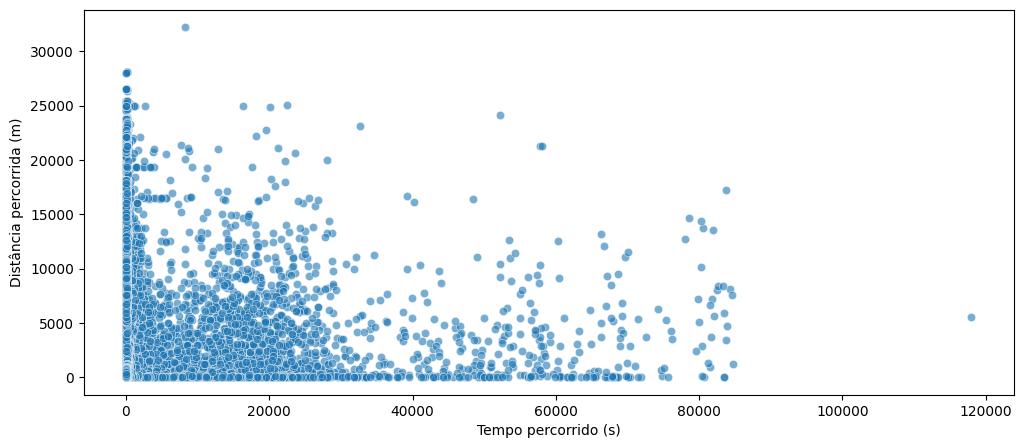

In [16]:
plt.figure(figsize=(12,5))
sns.scatterplot(
    data=df_posicoes,
    x="segundos_deslocamento",
    y="distancia_percorrida",
    alpha=0.6
)
plt.xlabel("Tempo percorrido (s)")
plt.ylabel("Distância percorrida (m)")
plt.show()

In [17]:
df_posicoes["hora"] = pd.to_datetime(df_posicoes["hora_gps"]).dt.hour

df_posicoes["periodo"] = np.where((df_posicoes["hora"] >= 22) | (df_posicoes["hora"] < 5),"madrugada","dia")

contagem = (df_posicoes[df_posicoes["velocidade"] > 60]["periodo"].value_counts(normalize=True) * 100)

print(contagem)

periodo
dia         83.85
madrugada   16.15
Name: proportion, dtype: float64


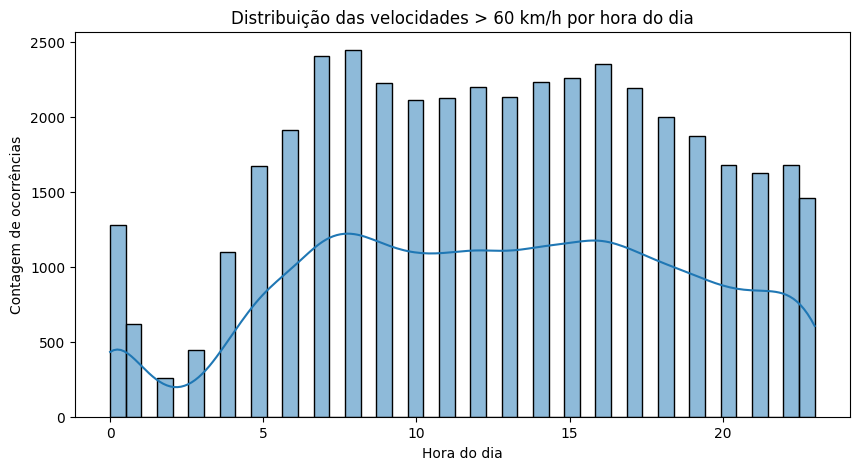

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(
    data=df_posicoes[df_posicoes["velocidade"] > 60],
    x="hora",
    kde=True
)
plt.title("Distribuição das velocidades > 60 km/h por hora do dia")
plt.xlabel("Hora do dia")
plt.ylabel("Contagem de ocorrências")
plt.show()